In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.datasets
import sklearn.cluster
import umap
import pandas as pd

In [27]:
data=pd.read_csv('OnlineNewsPopularity.csv')

In [28]:
data.keys()

Index(['url', ' timedelta', ' n_tokens_title', ' n_tokens_content',
       ' n_unique_tokens', ' n_non_stop_words', ' n_non_stop_unique_tokens',
       ' num_hrefs', ' num_self_hrefs', ' num_imgs', ' num_videos',
       ' average_token_length', ' num_keywords', ' data_channel_is_lifestyle',
       ' data_channel_is_entertainment', ' data_channel_is_bus',
       ' data_channel_is_socmed', ' data_channel_is_tech',
       ' data_channel_is_world', ' kw_min_min', ' kw_max_min', ' kw_avg_min',
       ' kw_min_max', ' kw_max_max', ' kw_avg_max', ' kw_min_avg',
       ' kw_max_avg', ' kw_avg_avg', ' self_reference_min_shares',
       ' self_reference_max_shares', ' self_reference_avg_sharess',
       ' weekday_is_monday', ' weekday_is_tuesday', ' weekday_is_wednesday',
       ' weekday_is_thursday', ' weekday_is_friday', ' weekday_is_saturday',
       ' weekday_is_sunday', ' is_weekend', ' LDA_00', ' LDA_01', ' LDA_02',
       ' LDA_03', ' LDA_04', ' global_subjectivity',
       ' global_sent

In [29]:
Y=data[' shares']
data=data.drop('url',axis=1)
data=data.drop(' shares',axis=1)

In [31]:
predictors=data.keys()
n = len(data[predictors])
X = np.array(data[predictors]).reshape((n, -1))

In [35]:
X=X[:-1]
Y=Y[:-1]

In [36]:
print(np.shape(X), np.shape(Y))

(32414, 59) (32414,)


In [37]:
reducer = umap.UMAP(n_neighbors=25)
reducer.fit(X)

/srv/conda/envs/notebook/lib/python3.7/site-packages/numba/typed_passes.py:293: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../../../../srv/conda/envs/notebook/lib/python3.7/site-packages/umap/rp_tree.py", line 135:
@numba.njit(fastmath=True, nogil=True, parallel=True)
def euclidean_random_projection_split(data, indices, rng_state):
^

  state.func_ir.loc))
/srv/conda/envs/notebook/lib/python3.7/site-packages/umap/nndescent.py:92: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../../../../srv/conda/envs/notebook/lib/p

UMAP(a=None, angular_rp_forest=False, b=None, init='spectral',
     learning_rate=1.0, local_connectivity=1.0, metric='euclidean',
     metric_kwds=None, min_dist=0.1, n_components=2, n_epochs=None,
     n_neighbors=25, negative_sample_rate=5, random_state=None,
     repulsion_strength=1.0, set_op_mix_ratio=1.0, spread=1.0,
     target_metric='categorical', target_metric_kwds=None,
     target_n_neighbors=-1, target_weight=0.5, transform_queue_size=4.0,
     transform_seed=42, verbose=False)

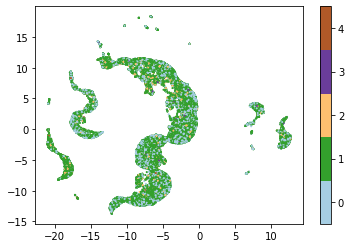

In [73]:
embedding = reducer.transform(X)
plt.scatter(embedding[:,0], embedding[:,1], c=target, cmap='Paired', s=1.0)
plt.colorbar(boundaries=np.arange(6)-0.5).set_ticks(np.arange(5))

In [58]:
ii = np.where(Y<=1000)
ii1 = np.where((Y<=10000) & (Y>1000))
ii2 = np.where((Y<=50000) & (Y>10000))
ii3 = np.where((Y<=100000) & (Y>50000))
ii4 = np.where(Y>100000)

In [60]:
target=np.ones(len(Y))

In [70]:
target[ii[0]]=0
target[ii1[0]]=1
target[ii2[0]]=2
target[ii3[0]]=3
target[ii4[0]]=4

In [64]:
target

array([1., 1., 2., ..., 1., 1., 3.])

In [74]:
# clusters sobre los resultados de tsne
n_clusters = 5
k_means = sklearn.cluster.KMeans(n_clusters=n_clusters)
k_means.fit(embedding) # training
cluster = k_means.predict(embedding) # predice a cual cluster corresponde cada elmento
distance = k_means.transform(embedding) # calcula la distancia de cada elemento al centro de su cluster

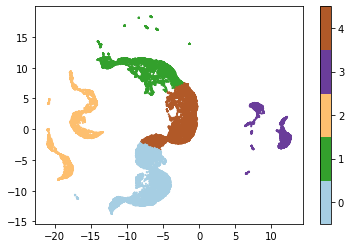

In [75]:
plt.scatter(embedding[:,0], embedding[:,1], c=cluster, cmap='Paired', s=1.0)
plt.colorbar(boundaries=np.arange(6)-0.5).set_ticks(np.arange(5))

Text(0.5, 1.0, 'Umap con Kmeans n_neigh = 25min_dist y metric casuales')

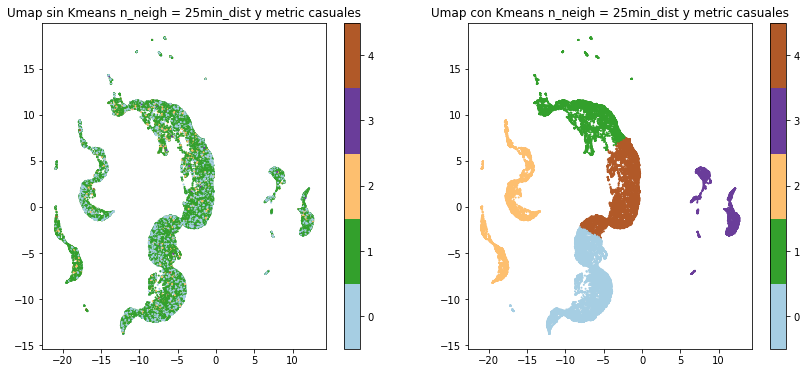

In [80]:
plt.figure(figsize=(14,6))
plt.subplot(121)
plt.scatter(embedding[:,0], embedding[:,1], c=target, cmap='Paired', s=1.0)
plt.colorbar(boundaries=np.arange(6)-0.5).set_ticks(np.arange(5))
plt.title('Umap sin Kmeans n_neigh = ' + str(25) + 'min_dist y metric casuales')
plt.subplot(122)
plt.scatter(embedding[:,0], embedding[:,1], c=cluster, cmap='Paired', s=1.0)
plt.colorbar(boundaries=np.arange(6)-0.5).set_ticks(np.arange(5))
plt.title('Umap con Kmeans n_neigh = ' + str(25)+ 'min_dist y metric casuales')

In [86]:
def f_map(n_neigh=25,min_d=0.1,met='euclidean'):
    reducer = umap.UMAP(n_neighbors=n_neigh,min_dist=min_d,metric=met)
    reducer.fit(X)
    embedding = reducer.transform(X)
    # clusters sobre los resultados de tsne
    n_clusters = 5
    k_means = sklearn.cluster.KMeans(n_clusters=n_clusters)
    k_means.fit(embedding) # training
    cluster = k_means.predict(embedding) # predice a cual cluster corresponde cada elmento
    distance = k_means.transform(embedding) # calcula la distancia de cada elemento al centro de su cluster
    
    plt.figure(figsize=(14,6))
    plt.subplot(121)
    plt.scatter(embedding[:,0], embedding[:,1], c=target, cmap='Paired', s=1.0)
    plt.colorbar(boundaries=np.arange(6)-0.5).set_ticks(np.arange(5))
    plt.title('Umap sin Kmeans n_neigh = ' + str(n_neigh) + ', min_dist = ' + str(min_d) + ' y metrica ' + met)
    plt.subplot(122)
    plt.scatter(embedding[:,0], embedding[:,1], c=cluster, cmap='Paired', s=1.0)
    plt.colorbar(boundaries=np.arange(6)-0.5).set_ticks(np.arange(5))
    plt.title('Umap con Kmeans n_neigh = ' + str(n_neigh)+  ', min_dist = ' + str(min_d) + ' y metrica ' + met)

## Cambios en el número de vecinos manteniendo constante la distancia y la metrica

In [87]:
n_neigh = [2,100,200]

/srv/conda/envs/notebook/lib/python3.7/site-packages/numba/typed_passes.py:293: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../../../../srv/conda/envs/notebook/lib/python3.7/site-packages/umap/nndescent.py", line 47:
    @numba.njit(parallel=True)
    def nn_descent(
    ^

  state.func_ir.loc))
/srv/conda/envs/notebook/lib/python3.7/site-packages/umap/spectral.py:229: UserWarning: Embedding a total of 5518 separate connected components using meta-embedding (experimental)
  n_components
/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/manifold/_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"
/srv/conda/envs

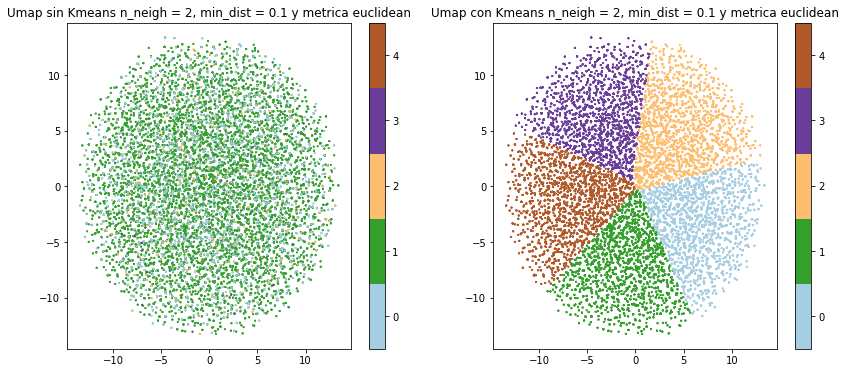

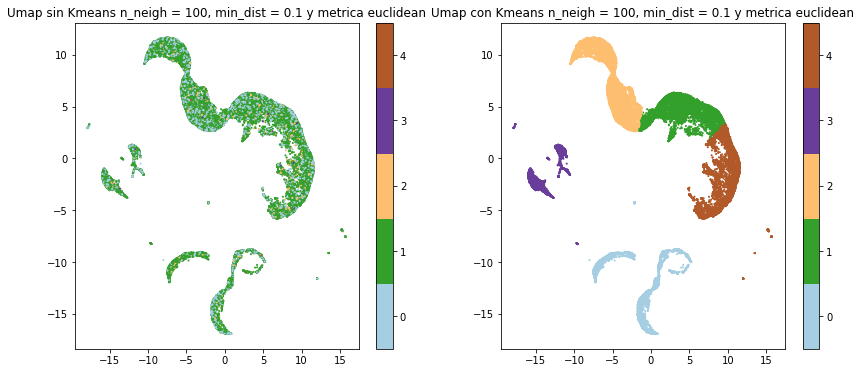

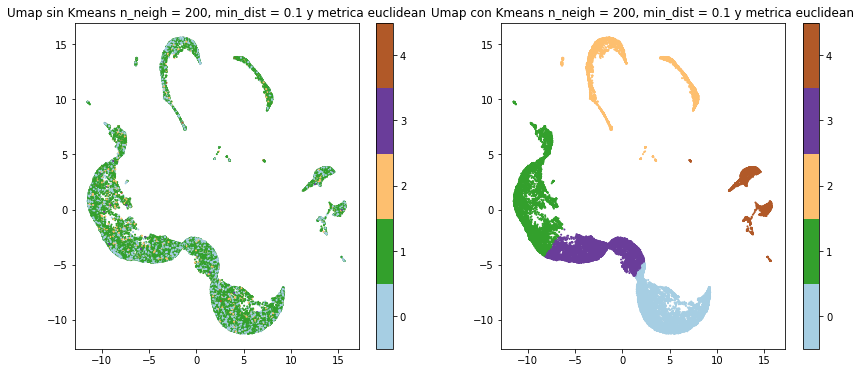

In [88]:
for i in n_neigh:
    f_map(i)

## Cambios en la distancia manteniendo constante la metrica y el número de vecinos

In [89]:
dist=[0.1,0.5,0.9]

/srv/conda/envs/notebook/lib/python3.7/site-packages/numba/typed_passes.py:293: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../../../../srv/conda/envs/notebook/lib/python3.7/site-packages/umap/nndescent.py", line 47:
    @numba.njit(parallel=True)
    def nn_descent(
    ^

  state.func_ir.loc))
/srv/conda/envs/notebook/lib/python3.7/site-packages/umap/spectral.py:229: UserWarning: Embedding a total of 2 separate connected components using meta-embedding (experimental)
  n_components
/srv/conda/envs/notebook/lib/python3.7/site-packages/numba/typed_passes.py:293: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, 

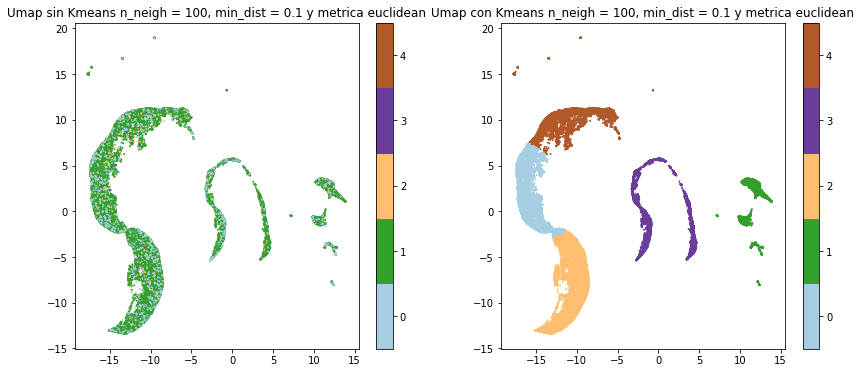

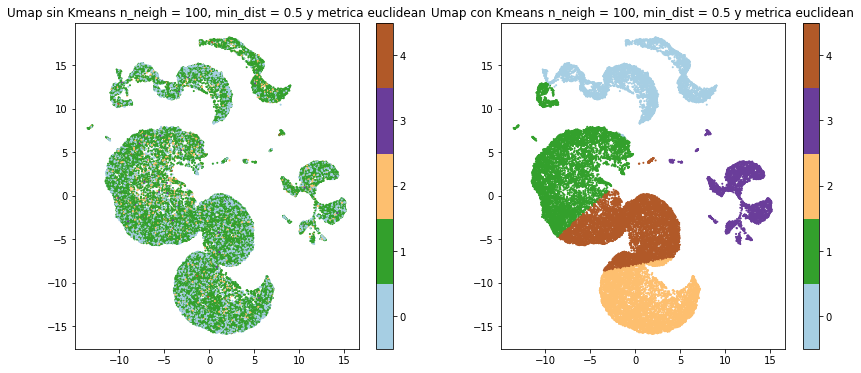

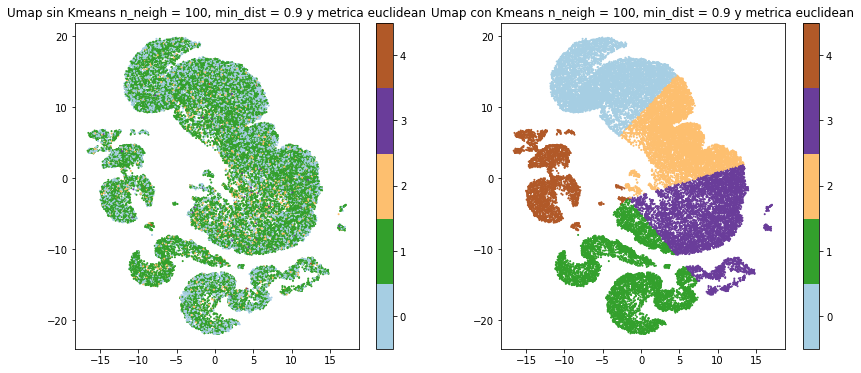

In [91]:
for i in dist:
    f_map(100,i,'euclidean')

## Cambios en la métrica manteniendo distancia y número de vecinos constante

In [92]:
metricas = ['euclidean','minkowski','cosine']

/srv/conda/envs/notebook/lib/python3.7/site-packages/numba/typed_passes.py:293: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../../../../srv/conda/envs/notebook/lib/python3.7/site-packages/umap/nndescent.py", line 47:
    @numba.njit(parallel=True)
    def nn_descent(
    ^

  state.func_ir.loc))
/srv/conda/envs/notebook/lib/python3.7/site-packages/numba/typed_passes.py:293: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../../../../srv/conda/envs/notebook/lib/python3.7/site-packages/umap/nndescent.py", line 47:
    @n

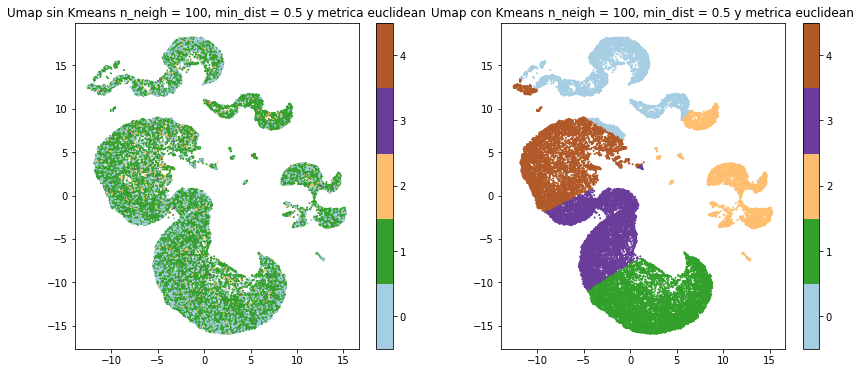

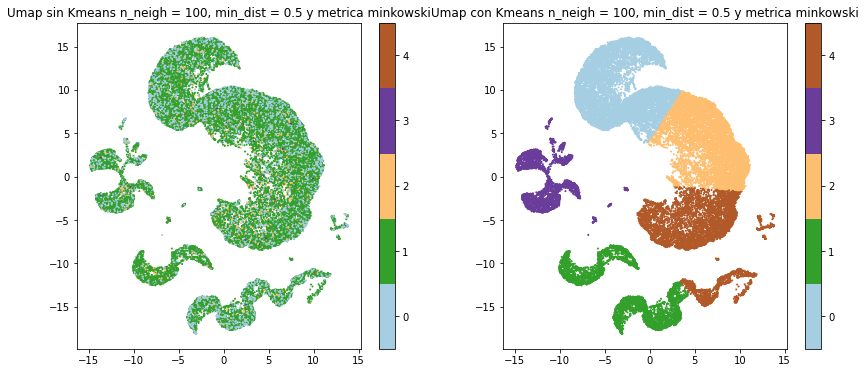

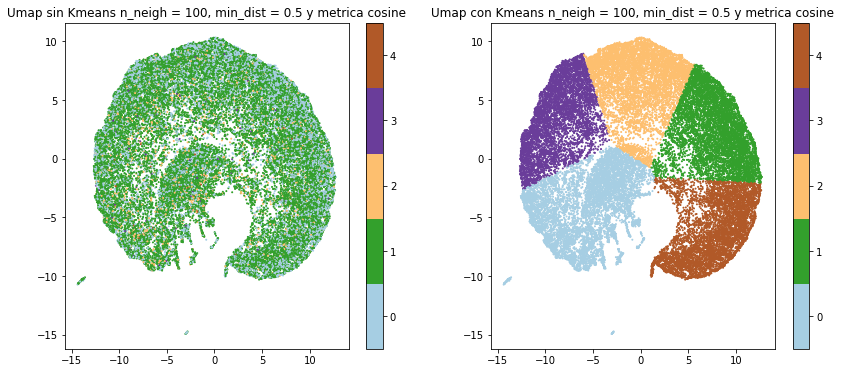

In [93]:
for i in metricas:
    f_map(100,0.5,i)